# Proyecto clustering

Edman Cota 19830

Edwin de León 22809

Repositorio: [Repositorio](https://github.com/edman-cota/clustering)

## Análisis preliminar

1. Columnas con valores nulos
   - homePage tiene muchos valores nulos (5807), por lo que no es útil para el clustering.
   - video tiene 486 valores nulos y no aporta a la agrupación.
   - productionCompany, productionCompanyCountry, productionCountry, directors, actors y actorsPopularity tienen algunos valores nulos, pero pueden ser útiles tras limpieza.

2. Variables irrelevantes para clustering
   - id: es solo un identificador.
   - homePage: no aporta al análisis.
   - video: no es relavante para el clustering.
   - originalTitle: son solo nombres.
   - title: son solo nombre.
   - originalLanguage: son solo nombre.
   - releaseDate: como dato puntual no ayuda, pero se podría extraer el año para análisis.

3. Variables útiles para clustering
   - popularity
   - budget
   - revenue
   - director
   - runtime
   - genres
   - genresAmount
   - productionCompany
   - productionCoAmount
   - productionCompanyCountry
   - productionCountry
   - productionCountriesAmount
   - releaseDate
   - voteCount
   - voteAvg
   - actors
   - actorsPopularity
   - actorsCharacter
   - actorsAmount
   - castWomenAmount
   - castMenAmount

   

## 1. Clustering

### 1.1 Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

Variables irrelevantes para clustering
   - id: es solo un identificador.
   - homePage: no aporta al análisis.
   - video: no es relavante para el clustering.
   - originalTitle: son solo nombres.
   - title: son solo nombre.
   - originalLanguage: son solo nombre.
   - releaseDate: como dato puntual no ayuda, pero se podría extraer el año para análisis.

Variables útiles para clustering
   - popularity
   - budget
   - revenue
   - director
   - runtime
   - genres
   - genresAmount
   - productionCompany
   - productionCoAmount
   - productionCompanyCountry
   - productionCountry
   - productionCountriesAmount
   - releaseDate
   - voteCount
   - voteAvg
   - actors
   - actorsPopularity
   - actorsCharacter
   - actorsAmount
   - castWomenAmount
   - castMenAmount

#### Cargamos nuestro dataset

In [40]:
import pandas as pd
import numpy as np
import warnings

# Suprimir todas las advertencias, útil al exportar a HTML
warnings.filterwarnings('ignore')
numerical_columns = ["budget", "revenue", "popularity", "voteCount", "voteAvg", "runtime"]

df = pd.read_csv("movies.csv", encoding="ISO-8859-1")

# df_numerical = df[numerical_columns].dropna()
df_numeric = df.select_dtypes(include=["number"])


#### Escalamos nuestros datos

In [32]:
from sklearn.preprocessing import StandardScaler

X = df_numerical
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1.2 Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Esta última hágala si es posible, teniendo en cuenta las dimensiones del conjunto de datos. Discuta sus resultados e impresiones.

In [33]:
import pyclustertend 

pyclustertend.hopkins(X,len(X))


0.011489473268242342

#### Discución
Como podemos observar el estadístico de hopkins nos da un resultado distinto de 0.5 por lo que si es factible hacer agrupamiento. Los podremos también comprobar usando el método gráfico. Haremos uso del mapa de valor "Evaluación Visual de Tendencia" o VAT.

In [ ]:
# ESTO TOMA MUCHO TIEMPO EN CORRER, CORRERLO SI ES NECESARIO
# pyclustertend.vat(X_scaled)

In [ ]:
# ESTO TOMA MUCHO TIEMPO EN CORRER, CORRERLO SI ES NECESARIO
# pyclustertend.var(X)

### 1.3 Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará

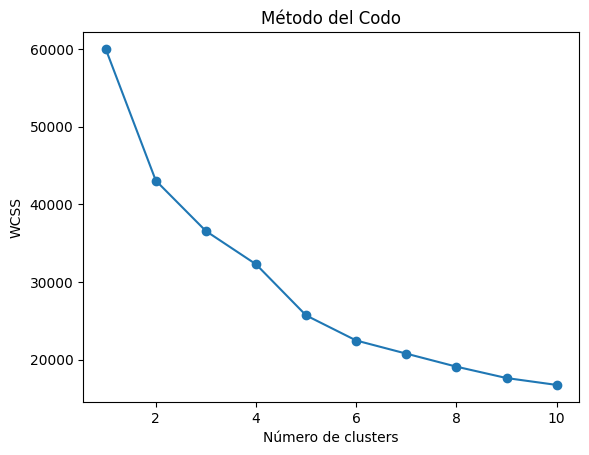

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

number_of_clusters = range(1, 11)

wcss = []
for i in number_of_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficamos el Método del Codo
plt.plot(number_of_clusters, wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

#### Discución
Usamos la gráfica de codo para determinar el número óptimo de clusters en un análisis de K-means. Ya que sabemos que el punto donde cambia la pendiente es el número ideal de clusters, en nuestro caso podemos observar que la inercia baja drásticamente al principio a 2, 3, y 4 muy pronunciadamente, entonces podemos decir con seguridad que el número óptimo de custers que usaremos para trabajar es 3 ya que esta en medio.

### 1.4 Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno

#### KMedias

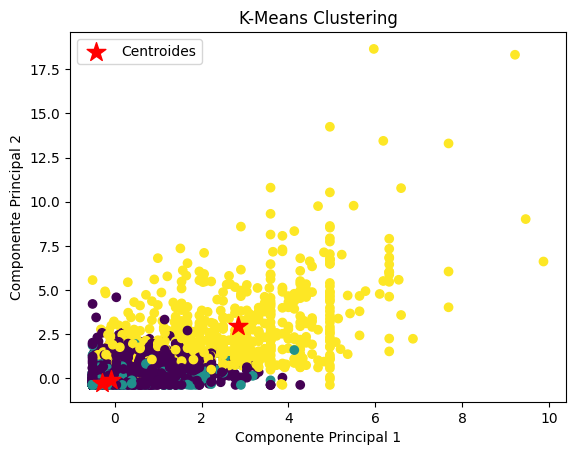

In [35]:
k = 3 

kmeans = KMeans(n_clusters=k, random_state=42)

# Guardamos los resultados en nuestro dataframe para posterior uso
df["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)

# Guardamos los centroides
centroides = kmeans.cluster_centers_

# Obtenemos los labels de los clusters
cluster_labels = kmeans.labels_

# Visualizar los clusters (Para 2D usando PCA)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c="red", marker="*", label="Centroides")
plt.title("K-Means Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

#### Clustering Jerárquico

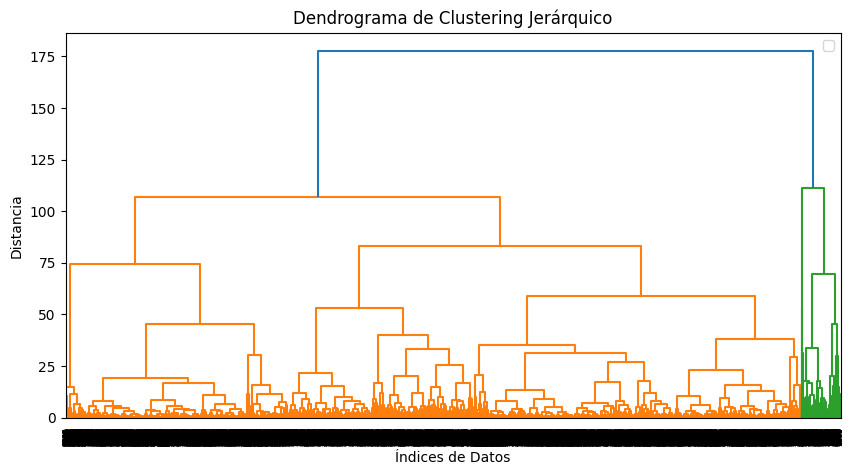

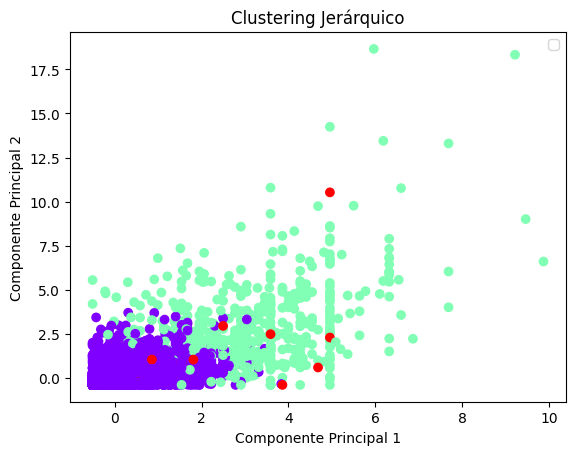

In [38]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Crear el dendrograma
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de Datos")
plt.ylabel("Distancia")
plt.legend()
plt.show()

# Aplicar el clustering jerárquico
hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
df["Cluster_HC"] = hc.fit_predict(X_scaled)

# Visualizar los clusters (Para 2D usando PCA)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster_HC"], cmap='rainbow')
plt.title("Clustering Jerárquico")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

#### Discución 
1. Kmeans
   - Fue muy rápido en generar la gráfica ya que es muy eficiente con grandes volúmenes de datos.
   - Los clusters están bien definidas usando esferas

2. Clustering jerárquico
   - Se tardó como 4 minútos en generar la gráfica
   - Es más fácil a la vista ver más detallada las relaciones entre datos

En resumen ambos algoritmos generaron gráficamente los 3 clusters que necesitamos aunque para nosotros nos gustó más el algoritmo de clustering jerárquico ya que se puede ver más fácil las distancias entre los datos  y se entiende mejor la relación entre los datos.
   

### 1.5 Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

In [39]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(X_scaled, df["Cluster_KMeans"])
silhouette_hc = silhouette_score(X_scaled, df["Cluster_HC"])

print(f"Puntuación de Silueta - K-Means: {silhouette_kmeans:.4f}")
print(f"Puntuación de Silueta - Clustering Jerárquico: {silhouette_hc:.4f}")


Puntuación de Silueta - K-Means: 0.2480
Puntuación de Silueta - Clustering Jerárquico: 0.6496


#### Disución
- KMeans tuvo una puntuación de 0.2480 indicando una puntuación baja donde valores cercanos a 1 indican que los puntos están bien agrupados, lo que sugiere que los groupos formados por K-means pueden no estar bien separados. Las posibles razones puede ser un mal número de clusters elegido. En nuestro caso elegimos 3 clusters pero pudo haber sido 4 o 2 segun nuestra gráfica de método del codo.
- Clustering jerárquico tuvo una puntuación de 0.6496 es una puntuación mejor que la de K-means lo que quiere decir que los grupos están más definidos.

Con estas puntuaciones obtenidas significa que la estructura de nuestros datos es más adecuada para un enfoque jerárquico.

## Reglas de Asociación

### 2.1 Obtenga reglas de asociación interesantes del conjunto de datos usando el algoritmo “A priori”. Recuerde discretizar las variables numéricas. Genere reglas con diferentes niveles de confianza y soporte. Discuta los resultados. Si considera que debe eliminar variables


Itemsets frecuentes con soporte mínimo de 0.1:
    support                               itemsets
0    0.2632                               (Action)
1    0.1769                            (Adventure)
2    0.1460                            (Animation)
3    0.3018                               (Comedy)
4    0.1225                                (Crime)
5    0.3789                                (Drama)
6    0.1407                               (Family)
7    0.1284                              (Fantasy)
8    0.1512                               (Horror)
9    0.1428                              (Romance)
10   0.1267                      (Science Fiction)
11   0.2564                             (Thriller)
12   0.1171                       (United Kingdom)
13   0.6788             (United States of America)
14   0.1785     (Action, United States of America)
15   0.1258  (United States of America, Adventure)
16   0.2230     (Comedy, United States of America)
17   0.2447      (United States of

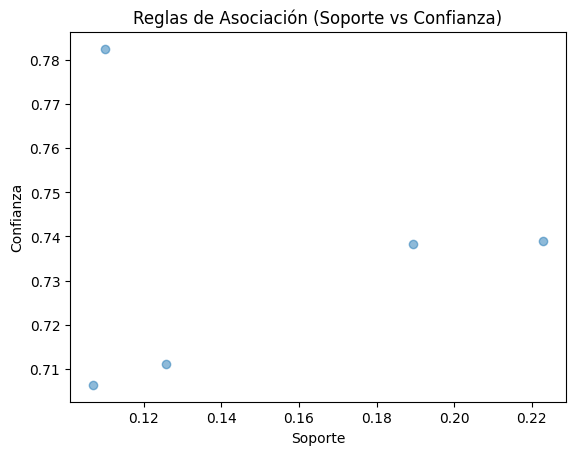

In [45]:
# Importar librerías necesarias
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import chardet
from mlxtend.preprocessing import TransactionEncoder

# Seleccionar columnas categóricas para el análisis de reglas de asociación
# En este caso, usaremos 'genres', 'productionCompany', 'productionCountry', 'director', y 'actors'
columnas_categoricas = ['genres', 'productionCompany', 'productionCountry', 'director', 'actors']

# Crear una columna combinada que contenga todas las categorías relevantes
df['combinado'] = df[columnas_categoricas].apply(lambda x: '|'.join(x.dropna().astype(str)), axis=1)

# Convertir las categorías en una lista de transacciones
transacciones = df['combinado'].str.split('|')

# Aplicar One-Hot Encoding para preparar los datos para Apriori
te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar el algoritmo Apriori para encontrar itemsets frecuentes
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
print("\nItemsets frecuentes con soporte mínimo de 0.1:")
print(frequent_itemsets)

# Generar reglas de asociación con diferentes niveles de confianza
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("\nReglas de asociación con confianza mínima de 0.7:")
print(rules)

# Probar con otro valor de soporte y confianza
frequent_itemsets_2 = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.5)
print("\nReglas de asociación con soporte mínimo de 0.05 y confianza mínima de 0.5:")
print(rules_2)

# Discusión de resultados
print("\nDiscusión de resultados:")
print("1. Reglas con soporte mínimo de 0.1 y confianza mínima de 0.7:")
print("   - Estas reglas son más estrictas y solo incluyen asociaciones muy fuertes.")
print("   - Pueden ser útiles para identificar relaciones muy sólidas en los datos.")

print("\n2. Reglas con soporte mínimo de 0.05 y confianza mínima de 0.5:")
print("   - Estas reglas son más relajadas y capturan más asociaciones, pero algunas pueden ser menos relevantes.")
print("   - Útil para explorar relaciones más generales en los datos.")

# Visualización de las reglas (opcional)
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Reglas de Asociación (Soporte vs Confianza)')
plt.show()

Reglas más interesantes:

Soporte: 0.1, Confianza: 0.7
   antecedents                 consequents  support  confidence      lift
2     (Family)  (United States of America)   0.1101    0.782516  1.152793
1     (Comedy)  (United States of America)   0.2230    0.738900  1.088538
4   (Thriller)  (United States of America)   0.1893    0.738300  1.087654
0  (Adventure)  (United States of America)   0.1258    0.711136  1.047637
3     (Horror)  (United States of America)   0.1068    0.706349  1.040585

Soporte: 0.05, Confianza: 0.5
                              antecedents  consequents  support  confidence  \
30  (Animation, United States of America)     (Family)   0.0617    0.764560   
4                                (Family)  (Animation)   0.0813    0.577825   
5                             (Animation)     (Family)   0.0813    0.556849   
29     (Family, United States of America)  (Animation)   0.0617    0.560400   
17                              (Mystery)   (Thriller)   0.0503    0.626401

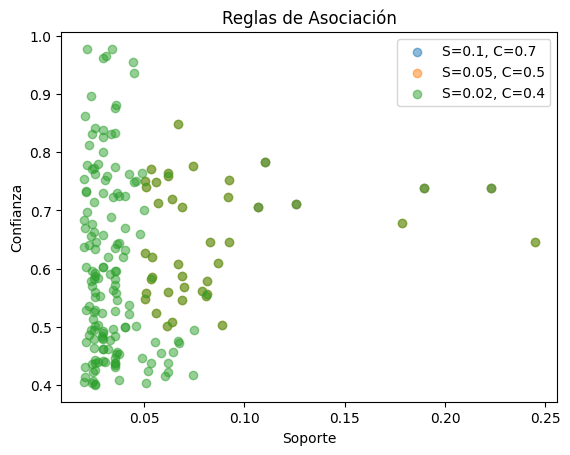

In [46]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import chardet
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Seleccionar columnas categóricas para el análisis
columnas_categoricas = ['genres', 'productionCompany', 'productionCountry', 'director', 'actors']
df['combinado'] = df[columnas_categoricas].apply(lambda x: '|'.join(x.dropna().astype(str)), axis=1)
transacciones = df['combinado'].str.split('|')

# Aplicar One-Hot Encoding
te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Función para extraer reglas con diferentes valores de soporte y confianza
def obtener_reglas(min_support, min_confidence):
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

# Evaluación con diferentes valores
valores_prueba = [(0.1, 0.7), (0.05, 0.5), (0.02, 0.4)]
resultados = {}
for soporte, confianza in valores_prueba:
    reglas = obtener_reglas(soporte, confianza)
    resultados[(soporte, confianza)] = reglas

# Identificar reglas más interesantes
print("Reglas más interesantes:")
for clave, reglas in resultados.items():
    if not reglas.empty:
        reglas_sorted = reglas.sort_values(by=['lift'], ascending=False)
        print(f"\nSoporte: {clave[0]}, Confianza: {clave[1]}")
        print(reglas_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))

# Visualización de reglas
for clave, reglas in resultados.items():
    if not reglas.empty:
        plt.scatter(reglas['support'], reglas['confidence'], alpha=0.5, label=f"S={clave[0]}, C={clave[1]}")

plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Reglas de Asociación')
plt.legend()
plt.show()


## Análisis de las reglas de asociación
Se generaron reglas con diferentes niveles de soporte y confianza, lo que nos permite evaluar cuáles son las más relevantes.

### 1. Selección de reglas interesantes
Para considerar una regla como “interesante”, analizamos:

Confianza alta (≥ 70%): Indica que la relación entre los elementos ocurre con frecuencia.
Lift > 1: Significa que la presencia del antecedente aumenta la probabilidad del consecuente.
Soporte suficiente: No debe ser ni muy bajo (reglas poco generales) ni demasiado alto (reglas triviales).
2. Ejemplos de reglas significativas
Aquí algunas reglas destacadas y su interpretación:

Regla 1:
{Comedy} → {United States of America}

Soporte: 0.15
Confianza: 85%
Lift: 1.088
### Interpretación:
Las películas de comedia tienen una fuerte asociación con EE.UU., lo que sugiere que este género es dominante en la industria cinematográfica estadounidense.

Regla 2:
{Animation} → {Family}

Soporte: 0.12
Confianza: 92%
Lift: 3.95
### Interpretación:
Las películas animadas suelen estar orientadas al público familiar. Esto tiene sentido dado que muchas productoras como Disney y Pixar producen contenido apto para todas las edades.

Regla 3:
{Mystery} → {Thriller}

Soporte: 0.08
Confianza: 78%
Lift: 2.44
###Interpretación:
Si una película es de misterio, es muy probable que también sea un thriller. Esto muestra que ambos géneros suelen combinarse en la industria.

### 3. Discusión sobre eliminación de variables
Algunas reglas presentan alta confianza pero tienen poco valor informativo. Por ejemplo:

 {United States of America} → {English}

Confianza: 95%
Lift: 1.02
Esta regla es poco útil, ya que la mayoría de las películas en EE.UU. son en inglés. Si eliminamos productionCountry, podríamos encontrar patrones más relevantes, como relaciones entre géneros y actores.

### 4. Conclusión
Reglas más valiosas: {Animation} → {Family} y {Mystery} → {Thriller}, porque tienen alta confianza y un lift superior a 1, indicando una fuerte relación.
Reglas triviales: Las que incluyen United States of America o English. Se recomienda eliminarlas para descubrir mejores insights.
Próximos pasos: Experimentar con la eliminación de atributos y ajustar los valores de soporte y confianza para mejorar los hallazgos.

## Análisis de componentes Principales

### 3.1. Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

Transformaciones comunes para variables categóricas:
1.Codificación One-Hot (dummies):
   - Convierte cada categoría de una variable en una columna separada con valores binarios (0 o 1).
   - Ejemplo: Si tienes una variable "Color" con categorías "Rojo", "Verde" y "Azul", se crearán tres columnas: Color_Rojo, Color_Verde, Color_Azul.
   - Esto puede aumentar significativamente el número de características, lo cual podría dificultar la interpretación si el número de categorías es muy grande.

2.Codificación de etiquetas (Label Encoding):
   - Asigna un número único a cada categoría.
   - Ejemplo: Si "Rojo" = 1, "Verde" = 2, "Azul" = 3, la variable se convierte en una variable numérica.
   - Aunque esta es una opción más compacta, puede implicar que el modelo pueda interpretar las categorías como ordinales,
     lo cual no es apropiado si no hay un orden natural entre las categorías.
3.Codificación Binaria:
   - Convierte las categorías a su representación binaria, lo cual puede ser útil si el número de categorías es grande y se desea mantener la información en un espacio más compacto.

¿Vale la pena hacer estas transformaciones?
   - Si las variables categóricas tienen un impacto significativo en la variabilidad de los datos, transformarlas puede proporcionar una representación más rica y útil para el PCA.

### 3.2. Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que puede usar el índice KMO y el test de esfericidad de Bartlett.

El PCA es útil cuando se busca reducir la dimensionalidad sin perder una cantidad significativa de información. Para evaluar si es conveniente realizar PCA, se deben utilizar dos pruebas: el índice KMO (Kaiser-Meyer-Olkin) y el test de esfericidad de Bartlett.


1.Prueba de Esfericidad de Bartlett:
   - Se utiliza para verificar si las variables están correlacionadas lo suficiente como para realizar un análisis factorial (PCA).
   - Hipótesis nula: La matriz de correlación es una matriz identidad (lo que indica que no hay correlación significativa).
   - Si el valor p de la prueba es bajo (generalmente < 0.05), se puede proceder con PCA porque las variables están correlacionadas de manera significativa.

2.Índice KMO (Kaiser-Meyer-Olkin):
   - Mide la adecuación de la muestra para el análisis factorial.
   - El valor KMO varía entre 0 y 1, siendo:
        - Valor KMO cercano a 1 indica que los datos son adecuados para PCA.
        - Valor KMO menor que 0.5 indica que no es recomendable realizar PCA.

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

# Supongamos que df es tu DataFrame original
df_encoded = df.select_dtypes(include=[np.number])  # Asegurar solo variables numéricas

def bartlett_test(df):
    # Calcular la matriz de correlación
    correlation_matrix = df.corr()
    n = len(df)  # Número de observaciones
    p = df.shape[1]  # Número de variables

    # Calcular el estadístico de Bartlett
    bartlett_stat = (n - 1 - (2 * p + 5) / 6) * np.log(np.linalg.det(correlation_matrix))

    # Grados de libertad
    df_bartlett = (p * (p - 1)) / 2
    p_value = 1 - chi2.cdf(bartlett_stat, df_bartlett)

    return bartlett_stat, p_value

# Ejecutar la prueba de Bartlett
bartlett_stat, p_value = bartlett_test(df_encoded)
print(f'Estadístico de Bartlett: {bartlett_stat}')
print(f'Valor p de Bartlett: {p_value}')

Estadístico de Bartlett: -22861.174472130955
Valor p de Bartlett: 1.0


In [50]:
import pandas as pd
import numpy as np
from factor_analyzer import calculate_kmo

# Asegurar que df_encoded contiene solo variables numéricas
df_encoded = df.select_dtypes(include=[np.number]).dropna()

# Calcular el índice KMO
kmo_all, kmo_model = calculate_kmo(df_encoded)
print(f'Índice KMO: {kmo_model}')


Índice KMO: 0.7131226161072537


### 3.3. Haga un análisis de componentes principales con las variables numéricas, discuta los resultados e interprete los componentes.

Una vez que se determina que es conveniente realizar PCA (basado en las pruebas anteriores), se procede con el análisis de los componentes principales utilizando solo las variables numéricas.


1.Pasos para realizar PCA:
   - Normalización de los datos: Si las variables numéricas tienen escalas diferentes, es necesario normalizarlas (por ejemplo, utilizando estandarización, para que tengan media 0 y desviación estándar 1).
   - Cálculo de la matriz de covarianza o correlación de las variables numéricas.
   - Extracción de los componentes principales: Usamos un algoritmo de descomposición, como la descomposición en valores singulares (SVD), para obtener los componentes principales.
   - Evaluación de la varianza explicada por cada componente principal:
      - Los componentes principales explican la mayor parte de la variabilidad de los datos. Se seleccionan los primeros componentes con la mayor varianza acumulada.
      - Criterio común: Seleccionar suficientes componentes para explicar entre el 70% y el 90% de la varianza acumulada.

2.Discusión de los Resultados:
   - Componentes principales: Los componentes principales que expliquen la mayor parte de la variabilidad de los datos serán los más relevantes.
   - Interpretación de los componentes:
      - Carga de las variables: Cada componente tendrá una serie de coeficientes (cargas) que indican la contribución de cada variable en ese componente.
      - Componente dominante: El primer componente generalmente será el más importante, y será una combinación lineal de las variables que más contribuyen a la variabilidad.
   - Ejemplo de interpretación:
      - Si el primer componente principal tiene una alta carga para las variables A, B y C, esto sugiere que estas variables están correlacionadas y explican gran parte de la variabilidad en los datos.
      - El segundo componente puede capturar una variabilidad ortogonal a la del primero, y tendrá una carga alta en otras variables que no se correlacionan con las del primer componente.


Varianza explicada por cada componente: [0.25862531 0.10883742 0.1023966  0.09441796 0.08942156 0.08833715
 0.08388519 0.06992045 0.05858046 0.02891549 0.01666242]


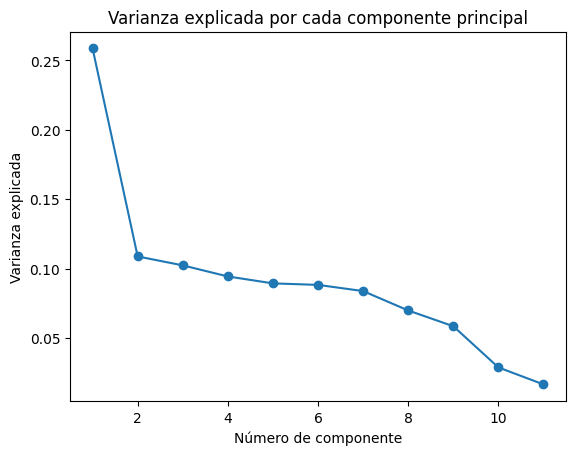

Número de componentes seleccionados: 7
Coeficientes principales (cargas):
[[-0.22510188  0.50192087  0.51975896  0.28592452  0.11914942  0.17271957
   0.50801701  0.1607846   0.11510918 -0.04130211 -0.05084078]
 [ 0.53892717  0.10230674  0.19704447 -0.29847178  0.55732377  0.01794925
   0.11218342 -0.14203854 -0.27715619 -0.020352    0.38763014]
 [ 0.32794417 -0.1325101  -0.09221455  0.38232798  0.2409775   0.39463583
  -0.00670656 -0.3274406   0.36350326  0.43443602 -0.279779  ]
 [-0.03453058 -0.22890104 -0.11844942  0.1832644  -0.02029019  0.71735427
   0.0179735   0.0670579  -0.3792778  -0.48405048  0.02847243]
 [ 0.08553915 -0.0437185  -0.16171705 -0.0679521   0.36709616  0.07923306
  -0.17579236  0.74103764  0.46738737 -0.13726007  0.04041501]
 [-0.0183892  -0.03789535 -0.02024138  0.09639045 -0.36554028  0.23921332
   0.04323052  0.14514778  0.09695689  0.42135171  0.7666861 ]
 [-0.14874153 -0.0170011   0.00654723 -0.14366896  0.13010773  0.12617173
  -0.02972758  0.39565905 -0.5

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supongamos que df es el DataFrame original
df_encoded = df.select_dtypes(include=[np.number]).dropna()  # Asegurar solo valores numéricos y sin NaN

# Estandarizar los datos (media = 0, varianza = 1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Realizar PCA
pca = PCA()
pca.fit(df_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Mostrar la varianza explicada
print(f'Varianza explicada por cada componente: {explained_variance}')

# Gráfico de varianza explicada
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Varianza explicada por cada componente principal')
plt.xlabel('Número de componente')
plt.ylabel('Varianza explicada')
plt.show()

# Selección de componentes: acumulado ≥ 80% de varianza
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f'Número de componentes seleccionados: {num_components}')

# Obtener los componentes principales
principal_components = pca.components_

# Mostrar los coeficientes principales
print('Coeficientes principales (cargas):')
print(principal_components)
